In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet

In [2]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
pd.options.display.max_columns = None
housing.sample(5)

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
526  528228465       1266     159895          20       RL         43.0   
724  533223080       1382     165000         160       FV          NaN   
348  533350050       1842     385000          20       RL         68.0   
311  527110080       1470     177000          60       RL          NaN   
179  532378160       1236     135000          20       RL         65.0   

     LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
526     3182   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
724     2651   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
348    50271   Pave   NaN      IR1         Low    AllPub    Inside       Gtl   
311    13869   Pave   NaN      IR2         Lvl    AllPub    Corner       Gtl   
179     6993   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
526      Blmngtn       Norm       Norm     1Fam     1Story            7   
724      Somerst       Norm       Norm    Twnhs     2Story            7   
348      Veenker       Norm       Norm     1Fam     1Story            9   
311      Gilbert       Norm       Norm     1Fam     2Story            6   
179       Sawyer      Feedr       Norm     1Fam     1Story            5   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
526            5       2007          2007     Gable  CompShg     VinylSd   
724            5       2000          2000     Gable  CompShg     MetalSd   
348            5       1981          1987     Gable  WdShngl     WdShing   
311            6       1997          1997     Gable  CompShg     VinylSd   
179            7       1961          1994     Gable  CompShg     HdBoard   

    Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
526     VinylSd    BrkFace        16.0        Gd        TA      PConc   
724     MetalSd       None         0.0        Gd        TA      PConc   
348     Wd Shng       None         0.0        Gd        TA     CBlock   
311     VinylSd       None         0.0        TA        TA      PConc   
179     Plywood       None         0.0        TA        TA     CBlock   

    BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
526       Gd       TA           Av          Unf         0.0          Unf   
724       Gd       TA           No          GLQ       641.0          Unf   
348       Ex       TA           Gd          GLQ      1810.0          Unf   
311       Gd       TA           Av          GLQ       182.0          Unf   
179       TA       TA           No          BLQ       465.0          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
526         0.0     1266.0       1266.0    GasA        Ex          Y   
724         0.0       32.0        673.0    GasA        Ex          Y   
348         0.0       32.0       1842.0    GasA        Gd          Y   
311         0.0      612.0        794.0    GasA        Gd          Y   
179         0.0      447.0        912.0    GasA        TA          Y   

    Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
526      SBrkr      1266         0             0           0.0           0.0   
724      SBrkr       673       709             0           1.0           0.0   
348      SBrkr      1842         0             0           2.0           0.0   
311      SBrkr       794       676             0           0.0           1.0   
179      SBrkr      1236         0             0           0.0           0.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
526         2         0             2             1          Gd             6   
724         2         1             3             1          Gd             6   
348         0         1             0             1          Gd             5   
311         2         0             3      

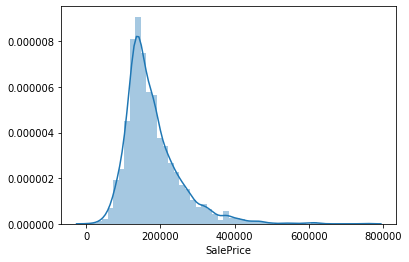

In [3]:
#check saleprice(target value)
sns.distplot(housing['SalePrice'])

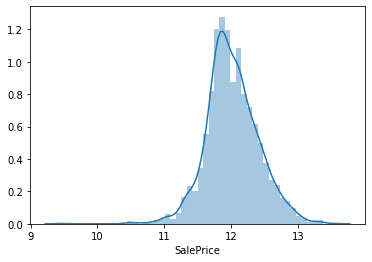

In [4]:

sns.distplot(np.log(housing['SalePrice']));

In [5]:
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

Missing Ratio
PoolQC            99.651163
MiscFeature       96.240310
Alley             93.488372
Fence             79.651163
FireplaceQu       48.100775
LotFrontage       17.906977
GarageYrBlt        5.000000
GarageCond         5.000000
GarageQual         5.000000
GarageFinish       5.000000
GarageType         4.922481
BsmtExposure       2.751938
BsmtFinType2       2.713178
BsmtCond           2.674419
BsmtQual           2.674419
BsmtFinType1       2.674419
MasVnrType         0.542636
MasVnrArea         0.542636
BsmtHalfBath       0.077519
BsmtFullBath       0.077519

Text(0.5, 1.0, 'Percent missing data by feature')

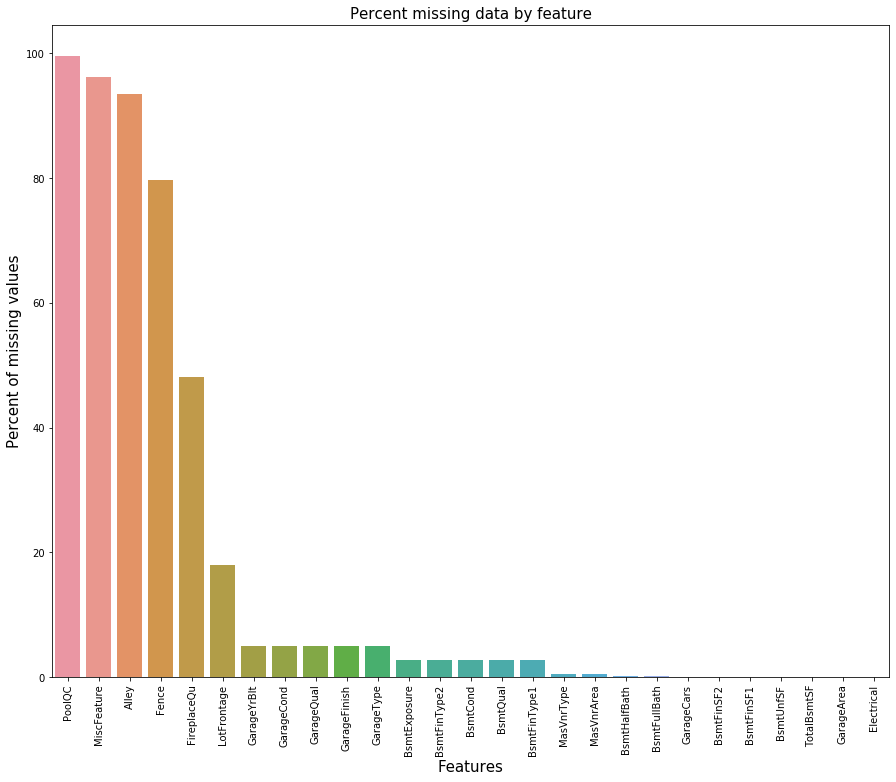

In [6]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Features cleaning

### PoolQC

In [7]:
housing["PoolQC"].value_counts()

TA    3
Ex    2
Fa    2
Gd    2
Name: PoolQC, dtype: int64

In [8]:
housing["PoolQC"] = housing["PoolQC"].fillna("None")
housing["PoolQC"].value_counts()

None    2571
TA         3
Ex         2
Fa         2
Gd         2
Name: PoolQC, dtype: int64

### MiscFeature

In [9]:
housing["MiscFeature"].value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
housing["MiscFeature"] = housing["MiscFeature"].fillna("None")
housing["MiscFeature"].value_counts()

None    2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

### Alley

In [11]:
housing["Alley"].value_counts()

Grvl    105
Pave     63
Name: Alley, dtype: int64

In [12]:
housing["Alley"] = housing["Alley"].fillna("None")
housing["Alley"].value_counts()

None    2412
Grvl     105
Pave      63
Name: Alley, dtype: int64

### Fence

In [13]:
housing["Fence"].value_counts()

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: Fence, dtype: int64

In [14]:
housing["Fence"] = housing["Fence"].fillna("None")
housing["Fence"].value_counts()

None     2055
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: Fence, dtype: int64

### FireplaceQu

In [15]:
housing["FireplaceQu"].value_counts()

Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64

In [16]:
housing["FireplaceQu"] = housing["FireplaceQu"].fillna("None")
housing["FireplaceQu"].value_counts()

None    1241
Gd       619
TA       572
Fa        70
Po        43
Ex        35
Name: FireplaceQu, dtype: int64

### LotFrontage

In [17]:
#LotFrontage: Linear feet of street connected to property
#fill with medium of neighborhood's LotFrontage
housing["LotFrontage"].describe()

count    2118.000000
mean       68.516053
std        22.835831
min        21.000000
25%        57.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
housing["LotFrontage"].fillna(housing.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)
housing[["Neighborhood","LotFrontage"]].head(30)

housing['LotFrontage'] =housing['LotFrontage'].fillna(value= housing.LotFrontage.median())


### GarageYrBlt, GarageType, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish

In [19]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

GarageYrBlt GarageType  GarageCars  GarageArea GarageQual GarageCond  \
1       1939.0     Detchd         2.0       399.0         TA         TA   
2       1984.0     Attchd         1.0       266.0         TA         TA   
3       1930.0     Detchd         1.0       216.0         TA         Po   
4       1940.0     Detchd         1.0       281.0         TA         TA   
5       2001.0     Attchd         2.0       528.0         TA         TA   

  GarageFinish  
1          Unf  
2          Fin  
3          Unf  
4          Unf  
5          Fin

In [20]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('nan')
housing['GarageType'] = housing['GarageType'].fillna("None")
housing['GarageQual'] = housing['GarageQual'].fillna("None")
housing['GarageCond'] = housing['GarageCond'].fillna("None")
housing['GarageFinish'] = housing['GarageFinish'].fillna("None")
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)

In [21]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

GarageYrBlt GarageType  GarageCars  GarageArea GarageQual GarageCond  \
1        1939     Detchd         2.0       399.0         TA         TA   
2        1984     Attchd         1.0       266.0         TA         TA   
3        1930     Detchd         1.0       216.0         TA         Po   
4        1940     Detchd         1.0       281.0         TA         TA   
5        2001     Attchd         2.0       528.0         TA         TA   

  GarageFinish  
1          Unf  
2          Fin  
3          Unf  
4          Unf  
5          Fin

### BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, BsmtFullBath, BsmtHalfBath,TotalBsmtSF, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF

In [22]:
#check null values

housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20) 

#if one col is null, all of these columns are null

BsmtFinType2 BsmtExposure BsmtFinType1 BsmtCond BsmtQual  BsmtFullBath  \
1           Unf           No          Rec       TA       TA           1.0   
2           ALQ           Mn          GLQ       TA       Gd           1.0   
3           Unf           No          ALQ       TA       TA           0.0   
4           Unf           No          Unf       TA       Fa           0.0   
5           Unf           No          GLQ       TA       Gd           1.0   
6           NaN          NaN          NaN      NaN      NaN           0.0   
7           Unf           No          Unf       TA       Fa           0.0   
8           Unf           Gd          Unf       TA       Gd           0.0   
9           Unf           No          ALQ       TA       TA           0.0   
10          Unf           Gd          GLQ       TA       Gd           1.0   
11          Unf           No          GLQ       TA       Gd           0.0   
12          Unf           No          Rec       TA       Gd           0.0   
13          Unf           No          Unf       TA       Fa           0.0   
14          Unf           No          BLQ       TA       Gd           1.0   
15          Unf           Av          GLQ       TA       Gd           1.0   
16          Unf           No          GLQ       TA       Gd           0.0   
17          Unf           No          GLQ       TA       Gd           1.0   
18          Unf           No          BLQ       TA       TA           1.0   
19          Unf           Mn          ALQ       TA       TA           1.0   
20          GLQ           Av          Rec       TA       Gd           0.0   

    BsmtHalfBath  TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  
1            0.0        856.0       238.0         0.0      618.0  
2            0.0       1049.0       552.0       393.0      104.0  
3            0.0        837.0       737.0         0.0      100.0  
4            0.0        405.0         0.0         0.0      405.0  
5            0.0        810.0       643.0         0.0      167.0  
6            0.0          0.0         0.0         0.0        0.0  
7            0.0        936.0         0.0         0.0      936.0  
8            0.0       1146.0         0.0         0.0     1146.0  
9            0.0        864.0       647.0         0.0      217.0  
10           0.0        547.0       467.0         0.0       80.0  
11           0.0       1342.0        24.0         0.0     1318.0  
12           0.0        624.0       458.0         0.0      166.0  
13           0.0        861.0         0.0         0.0      861.0  
14           0.0       1394.0       609.0         0.0      785.0  
15           0.0       1536.0       810.0         0.0      726.0  
16           1.0        886.0       602.0         0.0      284.0  
17           0.0       1274.0       925.0         0.0      349.0  
18           0.0        864.0        41.0         0.0      823.0  
19           0.0       1610.0      1200.0         0.0      410.0  
20           1.0        384.0       114.0       270.0        0.0

In [23]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna("None")
housing['BsmtExposure'] = housing['BsmtExposure'].fillna("None")
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna("None")
housing['BsmtCond'] = housing['BsmtCond'].fillna("None")
housing['BsmtQual'] = housing['BsmtQual'].fillna("None")
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].fillna(0)
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinSF2'] = housing['BsmtFinSF2'].fillna(0)
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0)

In [24]:
housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].head(20) 

BsmtFinType2 BsmtExposure BsmtFinType1 BsmtCond BsmtQual  BsmtFullBath  \
1           Unf           No          Rec       TA       TA           1.0   
2           ALQ           Mn          GLQ       TA       Gd           1.0   
3           Unf           No          ALQ       TA       TA           0.0   
4           Unf           No          Unf       TA       Fa           0.0   
5           Unf           No          GLQ       TA       Gd           1.0   
6          None         None         None     None     None           0.0   
7           Unf           No          Unf       TA       Fa           0.0   
8           Unf           Gd          Unf       TA       Gd           0.0   
9           Unf           No          ALQ       TA       TA           0.0   
10          Unf           Gd          GLQ       TA       Gd           1.0   
11          Unf           No          GLQ       TA       Gd           0.0   
12          Unf           No          Rec       TA       Gd           0.0   
13          Unf           No          Unf       TA       Fa           0.0   
14          Unf           No          BLQ       TA       Gd           1.0   
15          Unf           Av          GLQ       TA       Gd           1.0   
16          Unf           No          GLQ       TA       Gd           0.0   
17          Unf           No          GLQ       TA       Gd           1.0   
18          Unf           No          BLQ       TA       TA           1.0   
19          Unf           Mn          ALQ       TA       TA           1.0   
20          GLQ           Av          Rec       TA       Gd           0.0   

    BsmtHalfBath  TotalBsmtSF  
1            0.0        856.0  
2            0.0       1049.0  
3            0.0        837.0  
4            0.0        405.0  
5            0.0        810.0  
6            0.0          0.0  
7            0.0        936.0  
8            0.0       1146.0  
9            0.0        864.0  
10           0.0        547.0  
11           0.0       1342.0  
12           0.0        624.0  
13           0.0        861.0  
14           0.0       1394.0  
15           0.0       1536.0  
16           1.0        886.0  
17           0.0       1274.0  
18           0.0        864.0  
19           0.0       1610.0  
20           1.0        384.0

### MasVnrArea, MasVnrType

In [25]:
# 0 MasVnrArea means no Masonry veneer
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['MasVnrType'] = housing['MasVnrType'].fillna("None")

In [26]:
housing['MasVnrArea'].value_counts()

0.0      1568
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64

In [27]:
housing['MasVnrType'].value_counts() 

None       1573
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64

### Electrical

In [28]:
#only one null value of electrical
housing['Electrical'].value_counts() #SBrkr is most frequent value so we fill null as SBrkr

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [29]:
housing['Electrical'] = housing['Electrical'].fillna("SBrkr")

### MSZoning

In [30]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [31]:
#fill Nan with RL which is most frequent value
housing['MSZoning'] = housing['MSZoning'].fillna("RL")

In [32]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

### Utilities

In [33]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [34]:
#fill Nan with Allpub which is most frequent value 
housing['Utilities'] = housing['Utilities'].fillna("AllPub")

In [35]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

### Functional

In [36]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [37]:
#fill Nan with Typ which is most frequent value
housing['Functional'] = housing['Functional'].fillna("Typ")

In [38]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

### SaleType

In [39]:
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [40]:
housing['SaleType'] = housing['SaleType'].fillna("WD")
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

### KitchenQual

In [41]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

In [42]:
housing['KitchenQual'] = housing['KitchenQual'].fillna("TA")

In [43]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

### Exterior1st and Exterior2nd

In [44]:
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
CBlock       2
AsphShn      2
ImStucc      1
PreCast      1
Name: Exterior1st, dtype: int64

In [45]:
housing['Exterior1st'] = housing['Exterior1st'].fillna("VinylSd")
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
CBlock       2
AsphShn      2
ImStucc      1
PreCast      1
Name: Exterior1st, dtype: int64

In [46]:
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
Stone        4
AsphShn      4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

In [47]:
housing['Exterior2nd'] = housing['Exterior2nd'].fillna("VinylSd")
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
Stone        4
AsphShn      4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

### Check every features

In [48]:
#check null values 
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

Empty DataFrame
Columns: [Missing Ratio]
Index: []

### Utilities

In [49]:
housing["Utilities"].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [50]:
# Since Utilities feature have almost same value, so we better remove it
housing.drop('Utilities', axis=1, inplace=True)

### Correlation

In [51]:
corr = housing.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
corr 

OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652494
1stFlrSF         0.642613
GarageCars       0.638424
GarageArea       0.634669
YearBuilt        0.544370
FullBath         0.534982
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
LotFrontage      0.353905
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022668
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033786
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePrice, dtype: float64

In [52]:
# we better delete correlation range from -0.1 ~ 0.1 but will see after result from it
# housing.drop('3SsnPorch', axis=1, inplace=True)
# housing.drop('PoolArea', axis=1, inplace=True)
# housing.drop('BsmtFinSF2', axis=1, inplace=True)
# housing.drop('MoSold', axis=1, inplace=True)
# housing.drop('YrSold', axis=1, inplace=True)
# housing.drop('MiscVal', axis=1, inplace=True)
# housing.drop('BsmtHalfBath', axis=1, inplace=True)
# housing.drop('LowQualFinSF', axis=1, inplace=True)
# housing.drop('OverallCond', axis=1, inplace=True)
# housing.drop('MSSubClass', axis=1, inplace=True)

In [53]:
housing.shape #delete 10 cols

(2580, 80)

In [54]:
housing.columns


Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDriv

In [55]:
#Create
housing2 = housing.copy()
housing2['PriceSqft'] = housing.SalePrice/housing.GrLivArea

In [56]:
housing2.sample()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
544  911225110        936      78000          50  C (all)         60.0   

     LotArea Street Alley LotShape LandContour LotConfig LandSlope  \
544     8520   Grvl  None      Reg         Bnk    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
544       IDOTRR       Norm       Norm     1Fam     1.5Fin            3   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
544            5       1916          1950     Gable  CompShg     MetalSd   

    Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
544     MetalSd       None         0.0        TA        TA      PConc   

    BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
544       Fa       Fa           No          Unf         0.0          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
544         0.0      216.0        216.0    GasA        Fa          N   

    Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
544      SBrkr       576       360             0           0.0           0.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
544         1         0             2             1          TA             6   

    Functional  Fireplaces FireplaceQu GarageType GarageYrBlt GarageFinish  \
544        Typ           0        None       None         nan         None   

     GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
544         0.0         0.0       None       None          N           0   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  \
544            0              0          0            0         0   None   

    Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  \
544  None        None        0       4    2006      WD         Normal   

     PriceSqft  
544  83.333333

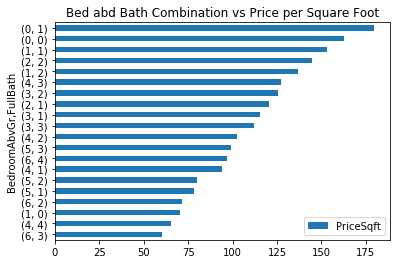

In [57]:
#housing2.loc[housing2.BedroomAbvGr >=1].\
housing2.groupby(['BedroomAbvGr', 'FullBath']).agg({'PriceSqft':'mean'}).\
sort_values(by='PriceSqft').plot(kind='barh', title='Bed abd Bath Combination vs Price per Square Foot')
plt.show()

In [58]:
housing2.groupby(['BedroomAbvGr', 'FullBath']).agg({'PriceSqft': 'mean'}).reset_index().\
pivot(index='BedroomAbvGr', columns='FullBath', values='PriceSqft')

FullBath              0           1           2           3          4
BedroomAbvGr                                                          
0             162.77707  179.535468         NaN         NaN        NaN
1              70.52123  153.106504  136.896549         NaN        NaN
2                   NaN  120.272286  144.778592         NaN        NaN
3                   NaN  115.285663  125.639537  112.079867        NaN
4                   NaN   94.089041  102.274788  127.343953  65.378289
5                   NaN   78.058375   80.235592   99.304975        NaN
6                   NaN         NaN   71.419028   60.377358  96.698959

In [59]:
housing2['bed_bath'] = housing['BedroomAbvGr'].apply(str).str.cat(housing['FullBath'].apply(str) , sep="-")
housing2

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1    909176150        856     126000          30       RL         60.0   
2    905476230       1049     139500         120       RL         42.0   
3    911128020       1001     124900          30  C (all)         60.0   
4    535377150       1039     114000          70       RL         80.0   
5    534177230       1665     227000          60       RL         70.0   
..         ...        ...        ...         ...      ...          ...   
759  903205040        952     121000          30       RL         51.5   
760  905402060       1733     139600          20       RL         65.0   
761  909275030       2002     145000          90       RH         82.0   
762  907192040       1842     217500          60       RL         70.0   
763  906223180       1911     215000          60       RL         80.0   

     LotArea Street Alley LotShape LandContour LotConfig LandSlope  \
1       7890   Pave  None      Reg         Lvl    Corner       Gtl   
2       4235   Pave  None      Reg         Lvl    Inside       Gtl   
3       6060   Pave  None      Reg         Lvl    Inside       Gtl   
4       8146   Pave  None      Reg         Lvl    Corner       Gtl   
5       8400   Pave  None      Reg         Lvl    Inside       Gtl   
..       ...    ...   ...      ...         ...       ...       ...   
759     8854   Pave  None      Reg         Lvl    Inside       Gtl   
760    13680   Pave  None      IR1         Lvl   CulDSac       Gtl   
761     6270   Pave  None      Reg         HLS    Inside       Gtl   
762     8826   Pave  None      Reg         Lvl    Inside       Gtl   
763     9554   Pave  None      IR1         Lvl    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
1          SWISU       Norm       Norm     1Fam     1Story            6   
2        Edwards       Norm       Norm   TwnhsE     1Story            5   
3         IDOTRR       Norm       Norm     1Fam     1Story            5   
4        OldTown       Norm       Norm     1Fam     2Story            4   
5         NWAmes       Norm       Norm     1Fam     2Story            8   
..           ...        ...        ...      ...        ...          ...   
759      BrkSide       Norm       Norm     1Fam     1.5Unf            6   
760      Edwards       Norm       Norm     1Fam     1Story            3   
761      Crawfor       Norm       Norm   Duplex     2Story            5   
762      CollgCr       Norm       Norm     1Fam     2Story            7   
763      SawyerW       Norm       Norm     1Fam     2Story            8   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
1              6       1939          1950     Gable  CompShg     Wd Sdng   
2              5       1984          1984     Gable  CompShg     HdBoard   
3              9       1930          2007       Hip  CompShg     MetalSd   
4              8       1900          2003     Gable  CompShg     MetalSd   
5              6       2001          2001     Gable  CompShg     VinylSd   
..           ...        ...           ...       ...      ...         ...   
759            6       1916          1950     Gable  CompShg     Wd Sdng   
760            5       1955          1955       Hip  CompShg     BrkFace   
761            6       1949          1950     Gable  CompShg     MetalSd   
762            5       2000          2000     Gable  CompShg     VinylSd   
763            5       1993          1994     Gable  CompShg     VinylSd   

    Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
1       Wd Sdng       None         0.0        TA        TA     CBlock   
2       HdBoard    BrkFace       149.0        Gd        TA     CBlock   
3       MetalSd       None         0.0        Gd        TA     BrkTil   
4       MetalSd       None         0.0        Gd        Gd     BrkTil   
5       VinylSd       None         0.0        Gd        TA      PConc   
..          ...        ...   

In [60]:
housing2.bed_bath.value_counts()

3-2    752
3-1    642
2-1    395
4-2    263
2-2    261
1-1     87
4-1     66
5-2     25
4-3     19
6-2     16
3-3     15
1-2     10
5-3     10
0-0      6
5-1      5
6-4      3
1-0      2
0-1      1
6-3      1
4-4      1
Name: bed_bath, dtype: int64

In [61]:
use_columns = ['BedroomAbvGr', "FullBath"]

In [62]:
features = pd.get_dummies(housing[use_columns], drop_first=True, dummy_na=True)
target = np.log(housing['SalePrice'])


In [63]:
import statsmodels.api as sm
# X = sm.add_constant(features)
# # Notice that the dependent variable (y) comes before the independent variables (x)
# # Use df.columns.values to get all the column names
# model = sm.OLS(target, X)
# results = model.fit()
# print(results.summary())

In [64]:
housing['bb_diff']= np.abs(housing.BedroomAbvGr - housing.FullBath)


In [65]:
use_columns2 = ['BedroomAbvGr', "FullBath", 'bb_diff']


In [66]:
features2 = pd.get_dummies(housing[use_columns2], drop_first=True, dummy_na=True)
target2 = np.log(housing['SalePrice'])


In [67]:
# x = sm.add_constant(features2)
# # Notice that the dependent variable (y) comes before the independent variables (x)
# # Use df.columns.values to get all the column names
# model = sm.OLS(target2, x)
# results = model.fit()
# print(results.summary())

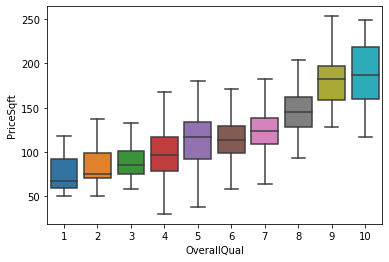

In [68]:
sns.boxplot(data=housing2, x='OverallQual', y='PriceSqft', showfliers=False)

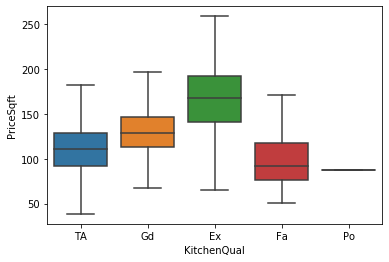

In [69]:
sns.boxplot(data=housing2, x='KitchenQual', y='PriceSqft', showfliers=False)

### Age of the House & Neighborhood VS Price Per Square Foot

In [70]:
# Creates column 'AgeWhenSold' which calculates the age of the house by the time it was sold
housing2['AgeWhenSold'] = housing2.YrSold - housing2.YearBuilt

In [71]:
# Creates dataframe with 'AgeWhenSold', 'Neighborhood' and 'PricePerSqft'
age_n = housing2[['AgeWhenSold', 'Neighborhood', 'PriceSqft']]

In [72]:
# Display the chart with the average of price per square foot per age
age_n.groupby(['AgeWhenSold']).agg({'PriceSqft' : 'mean'})

PriceSqft
AgeWhenSold            
0            162.500014
1            155.876637
2            147.429409
3            149.332762
4            138.279557
...                 ...
127           74.804147
128           79.920873
129           82.864890
135           92.156863
136           51.738762

[127 rows x 1 columns]

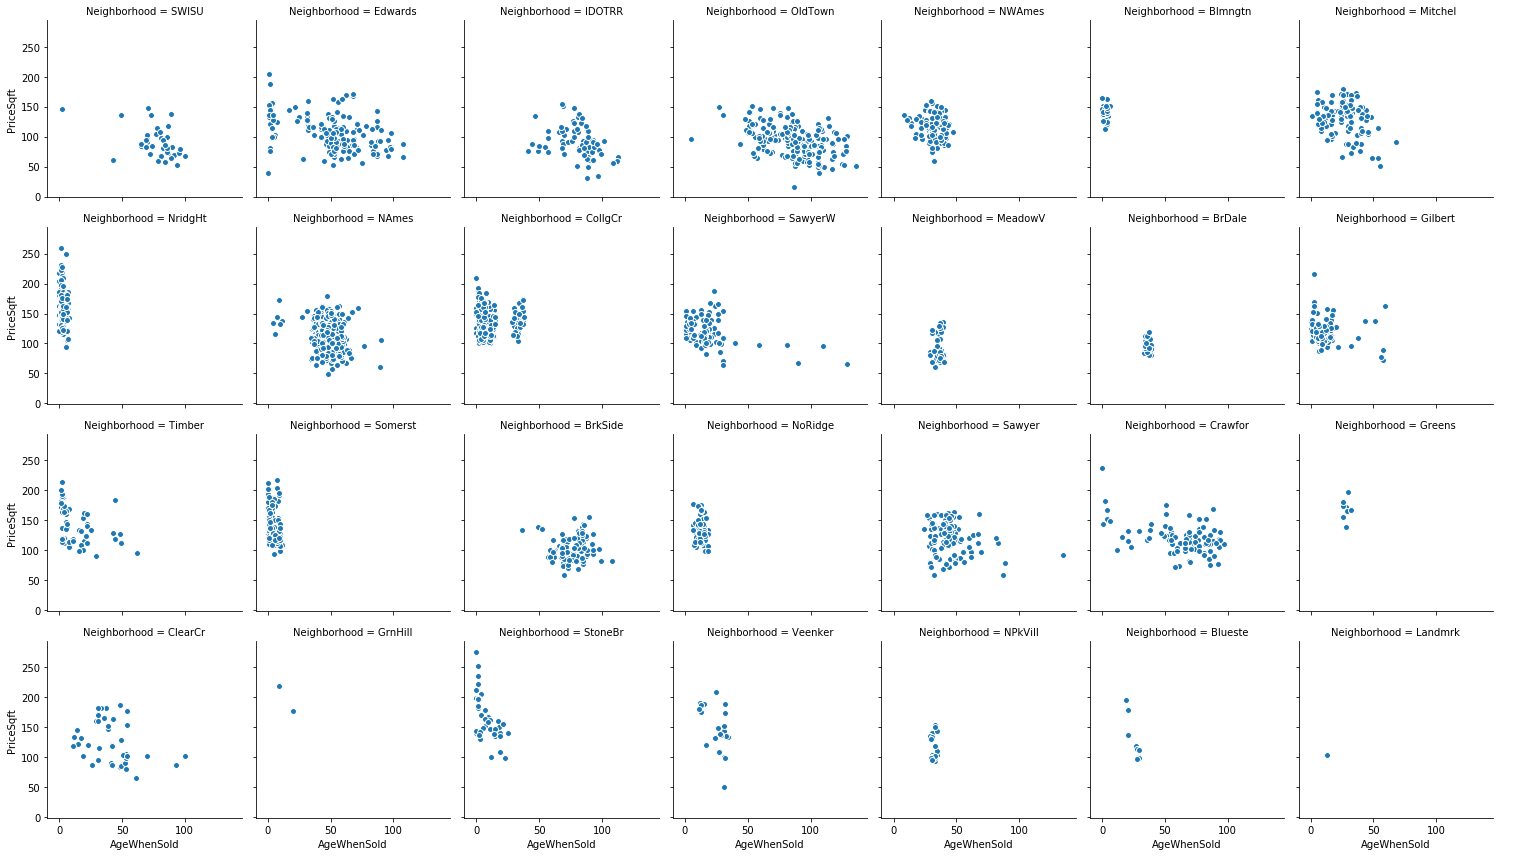

In [73]:
# Creates a grid for every neighborhoow to see the trend between "AgeWhenSold" and "PricePerSqFt"
age_n_plot = sns.FacetGrid(age_n, col="Neighborhood", col_wrap=7)
age_n_plot.map(plt.scatter, "AgeWhenSold", "PriceSqft", edgecolor="w").add_legend()
age_n_plot

- In the neighborhoods where its houses are built around the same year, they might have variation in prices due to different features of the house other than the age
- In the neighborhoods where its houses are built in different years, negative correlations are seen between the age and the price per square foot

### Trend of Price per Square Foot depending on its Built Year

In [74]:
# # Creates line plots depending on its difference in # of bathrooms and # of bedrooms
# diff_df = housing2.groupby(['bb_diff','YearBuilt']).PriceSqft.mean()
# diff_df = diff_df.unstack(level='bb_diff')
# diff_df.columns.name = 'PriceSqft'
# diff_df.dropna(subset=['lessEq1', 'more1']).plot(title = "Trend of Price Per Square Foot", figsize = (12,10))


#  Central AC and Fireplace

People favor having central AC than a fireplace.

In [75]:
housing2.Fireplaces.value_counts()

0    1241
1    1132
2     195
3      11
4       1
Name: Fireplaces, dtype: int64

In [76]:
housing2.CentralAir.value_counts()

Y    2417
N     163
Name: CentralAir, dtype: int64

In [77]:
ac_fire = housing2.loc[:, ['Fireplaces', 'CentralAir', 'PriceSqft']]
ac_fire['with_fireplace'] = ac_fire.Fireplaces.apply(lambda x : 'N'  if x==0 else 'Y')
ac_fire

Fireplaces CentralAir   PriceSqft with_fireplace
1             1          Y  147.196262              Y
2             0          Y  132.983794              N
3             0          Y  124.775225              N
4             0          Y  109.720885              N
5             0          Y  136.336336              N
..          ...        ...         ...            ...
759           1          N  127.100840              Y
760           1          Y   80.553953              Y
761           0          N   72.427572              N
762           1          Y  118.078176              Y
763           1          Y  112.506541              Y

[2580 rows x 4 columns]

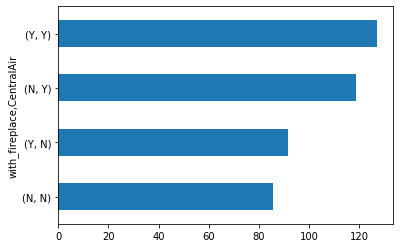

In [78]:
ac_fire.groupby(['with_fireplace', 'CentralAir'])['PriceSqft'].mean().sort_values()\
.plot(kind='barh')

# Predictive Modeling

In [79]:
housingFinal = housing.copy()

In [80]:
housingFinal.drop('PID', axis=1, inplace=True)

In [81]:
housingFinal.LotFrontage= housingFinal.LotFrontage.fillna(value= np.median(housingFinal.LotFrontage))

In [82]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
housingFinal['ExterQual'] = encoder.fit_transform(housingFinal[['ExterQual']])
housingFinal['ExterCond'] = encoder.fit_transform(housingFinal[['ExterCond']])
housingFinal['BsmtQual'] = encoder.fit_transform(housingFinal[['BsmtQual']])
housingFinal['BsmtCond'] = encoder.fit_transform(housingFinal[['BsmtCond']])
housingFinal['HeatingQC'] = encoder.fit_transform(housingFinal[['HeatingQC']])
housingFinal['FireplaceQu'] = encoder.fit_transform(housingFinal[['FireplaceQu']])
housingFinal['GarageQual'] = encoder.fit_transform(housingFinal[['GarageQual']])
housingFinal['GarageCond'] = encoder.fit_transform(housingFinal[['GarageCond']])
housingFinal['PoolQC'] = encoder.fit_transform(housingFinal[['PoolQC']])
housingFinal['KitchenQual'] = encoder.fit_transform(housingFinal[['KitchenQual']])

In [83]:
housingFinal.drop('bb_diff',axis=1, inplace=True)

In [84]:
housingFinal['ageWhenSold'] = housingFinal.YrSold - housingFinal.YearBuilt
housingFinal.drop(['YearBuilt', 'YrSold'], axis=1, inplace=True)

In [85]:
housingFinal

GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea Street  \
1          856     126000          30       RL         60.0     7890   Pave   
2         1049     139500         120       RL         42.0     4235   Pave   
3         1001     124900          30  C (all)         60.0     6060   Pave   
4         1039     114000          70       RL         80.0     8146   Pave   
5         1665     227000          60       RL         70.0     8400   Pave   
..         ...        ...         ...      ...          ...      ...    ...   
759        952     121000          30       RL         51.5     8854   Pave   
760       1733     139600          20       RL         65.0    13680   Pave   
761       2002     145000          90       RH         82.0     6270   Pave   
762       1842     217500          60       RL         70.0     8826   Pave   
763       1911     215000          60       RL         80.0     9554   Pave   

    Alley LotShape LandContour LotConfig LandSlope Neighborhood Condition1  \
1    None      Reg         Lvl    Corner       Gtl        SWISU       Norm   
2    None      Reg         Lvl    Inside       Gtl      Edwards       Norm   
3    None      Reg         Lvl    Inside       Gtl       IDOTRR       Norm   
4    None      Reg         Lvl    Corner       Gtl      OldTown       Norm   
5    None      Reg         Lvl    Inside       Gtl       NWAmes       Norm   
..    ...      ...         ...       ...       ...          ...        ...   
759  None      Reg         Lvl    Inside       Gtl      BrkSide       Norm   
760  None      IR1         Lvl   CulDSac       Gtl      Edwards       Norm   
761  None      Reg         HLS    Inside       Gtl      Crawfor       Norm   
762  None      Reg         Lvl    Inside       Gtl      CollgCr       Norm   
763  None      IR1         Lvl    Inside       Gtl      SawyerW       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd  \
1         Norm     1Fam     1Story            6            6          1950   
2         Norm   TwnhsE     1Story            5            5          1984   
3         Norm     1Fam     1Story            5            9          2007   
4         Norm     1Fam     2Story            4            8          2003   
5         Norm     1Fam     2Story            8            6          2001   
..         ...      ...        ...          ...          ...           ...   
759       Norm     1Fam     1.5Unf            6            6          1950   
760       Norm     1Fam     1Story            3            5          1955   
761       Norm   Duplex     2Story            5            6          1950   
762       Norm     1Fam     2Story            7            5          2000   
763       Norm     1Fam     2Story            8            5          1994   

    RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1       Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0   
2       Gable  CompShg     HdBoard     HdBoard    BrkFace       149.0   
3         Hip  CompShg     MetalSd     MetalSd       None         0.0   
4       Gable  CompShg     MetalSd     MetalSd       None         0.0   
5       Gable  CompShg     VinylSd     VinylSd       None         0.0   
..        ...      ...         ...         ...        ...         ...   
759     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0   
760       Hip  CompShg     BrkFace     Wd Sdng       None         0.0   
761     Gable  CompShg     MetalSd     MetalSd       None         0.0   
762     Gable  CompShg     VinylSd     VinylSd    BrkFace       144.0   
763     Gable  CompShg     VinylSd     VinylSd    BrkFace       125.0   

     ExterQual  ExterCond Foundation  BsmtQual  BsmtCond BsmtExposure  \
1          3.0        4.0     CBlock       5.0       5.0           No   
2          2.0        4.0     CBlock       2.0       5.0           Mn   
3          2.0        4.0     BrkTil       5.0       5.0           No   
4          2.

In [86]:
catVar= housingFinal.loc[:, housingFinal.dtypes==object].copy()
catVar.drop('GarageYrBlt', axis=1, inplace=True)


In [87]:
target = np.log(housingFinal.SalePrice)
target

1      11.744037
2      11.845820
3      11.735269
4      11.643954
5      12.332705
         ...    
759    11.703546
760    11.846536
761    11.884489
762    12.289954
763    12.278393
Name: SalePrice, Length: 2580, dtype: float64

In [88]:
catVar = pd.get_dummies(catVar, drop_first=True, dummy_na=True)

In [89]:
numVar = housingFinal.loc[:, housingFinal.dtypes!=object].copy()
numVar.drop('SalePrice', axis= 1, inplace=True)

In [90]:
houseFeatures = pd.concat([catVar, numVar], axis=1)
houseFeatures.shape

(2580, 262)

In [91]:
GridSearchCV?

Object `GridSearchCV` not found.


In [92]:
#Split the data to 805 to 20%s
np.random.seed(4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(houseFeatures, target, test_size=0.2, random_state=42)

# Lasso and GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
lasso.set_params(max_iter=3000 , normalize=True)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=3000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [94]:
lasso?

In [95]:
# grid_param = [{'alpha': np.linspace(1e-5, 1e-3,  100)}]
# ## fit all models
# lasso_search = GridSearchCV(lasso, param_grid=grid_param, cv=10, return_train_score=True, n_jobs=-1)
# lasso_search.fit(X_train, y_train)


In [96]:
lasso_search.best_params_

NameError: name 'lasso_search' is not defined

In [ ]:
# R2 for the best estimator using the trainng data sets
lasso_search.best_score_

In [ ]:
lasso_search.score(X_test, y_test)


In [ ]:
import pickle
lasso_model = pickle.dumps(lasso_search)
lasso_model2 = pickle.loads(lasso_model)



In [97]:
lasso_model2

NameError: name 'lasso_model2' is not defined

## Ridge + GridSearchCV

In [ ]:
ridge= Ridge()
ridge.set_params(normalize=True, max_iter=2000)

In [ ]:
# grid_param = [{'alpha': np.linspace(.01, 1,  100)}]
# ## fit all models
# ridge_search = GridSearchCV(ridge, param_grid=grid_param, cv=10, return_train_score=True, n_jobs=-1)
# ridge_search.fit(X_train, y_train)

In [ ]:
ridge_search.best_params_

In [ ]:
ridge_search.best_score_

In [ ]:
ridge_search.score(X_test, y_test)

In [ ]:
ridge_model = pickle.dumps(ridge_search)
ridge_model2 = pickle.loads(ridge_model)


## Ramdom Forest Regressor + GridSearchCV

In [116]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

In [117]:
housing3 =housingFinal.copy()
housing3['bb_diff'] = abs(housing3.BedroomAbvGr - housing3.FullBath)

In [118]:
housing3.drop(['GarageYrBlt'], axis= 1, inplace=True)

In [193]:
features_cat = housing3.loc[:,housing3.dtypes==object]
features_num = housing3.loc[:,housing3.dtypes!=object].drop('SalePrice', axis=1)
target=np.log(housing3.SalePrice)

In [194]:
from sklearn.preprocessing import LabelEncoder
features_cat =features_cat.apply(LabelEncoder().fit_transform)

In [195]:
features =pd.concat([features_cat, features_num], axis=1)
features.shape

(2580, 77)

In [196]:
#Split the data to 80% to 20%s
np.random.seed(4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [197]:
grid_para_forest = [{
    "n_estimators": [80, 90, 100],
    "max_features" : np.linspace(15, 30, 30, dtype=int),
     "random_state": [42]}]

grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

Wall time: 1min 6s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [198]:
grid_search_forest.best_params_

{'max_features': 23, 'n_estimators': 80, 'random_state': 42}

In [199]:
grid_search_forest.best_score_

0.8934695858648178

In [200]:
grid_search_forest.score(X_test, y_test)

0.9108116298635615

In [ ]:
import pickle
forest_model = pickle.dumps(grid_search_forest)
forest_model2 = pickle.loads(forest_model)



In [ ]:
grid_search_forest.cv_results_

In [155]:
randomForest2 = ensemble.RandomForestRegressor()
randomForest2.set_params(min_samples_leaf = 2, min_samples_split = 7, n_estimators=20, random_state=42)
randomForest2.fit(X_train, y_train)
randomForest2.score(X_test, y_test)



0.89526870027138

In [166]:
feature_importance = list(zip(X_train.columns, randomForest2.feature_importances_))
# #dtype = [('feature', 'S10'), ('importance', 'float')]
# feature_importance = np.array(feature_importance, dtype=dtype)
# feature_sort = np.sort(feature_importance, order='importance')[::-1]

sorted_importance2 = sorted(zip(X_train.columns, randomForest2.feature_importances_), key=lambda t:t[1], reverse=True)[:15]
sorted_importance2.sort(key= lambda t : t[1])
sorted_importance2


[('Neighborhood', 0.005286611179858921),
 ('LotFrontage', 0.005556947983848311),
 ('Fireplaces', 0.006113026548451651),
 ('FullBath', 0.007057167190726435),
 ('YearRemodAdd', 0.007226055190351824),
 ('GarageCars', 0.009262754030094151),
 ('ageWhenSold', 0.01047908000391213),
 ('LotArea', 0.010707690873952937),
 ('MasVnrArea', 0.012488759263160839),
 ('BsmtFinSF1', 0.017688577429633697),
 ('GarageArea', 0.03264466165500494),
 ('TotalBsmtSF', 0.05115257536397352),
 ('1stFlrSF', 0.05692050016981476),
 ('GrLivArea', 0.13536435684880094),
 ('OverallQual', 0.5616156355495463)]

Text(0.5, 1.0, 'Feature Importance Random Forest Regressor')

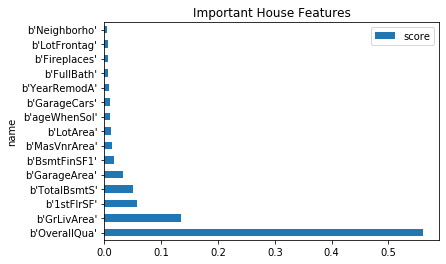

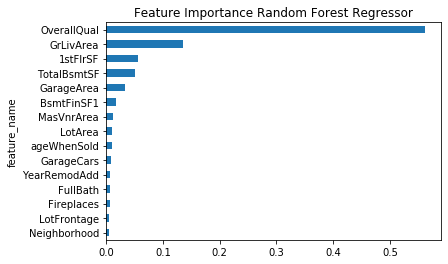

In [167]:
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.barh(x='name', y='score', title= 'Important House Features')


a, b = zip(*sorted_importance2) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Random Forest Regressor')

<!-- ## Gradient Boosting Regressor using GridSearchCV -->

## Gradient Boosting Regressor


In [201]:
gbm= ensemble.GradientBoostingRegressor()

grid_boost_para = [{
    "n_estimators": [100, 300, 500],
   "learning_rate":np.linspace(start=0, stop=1, num=10) }]

grid_boost = GridSearchCV(gbm, grid_boost_para, cv=5, n_jobs=-1)
%time grid_boost.fit(X_train, y_train)

Wall time: 1min


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [202]:
grid_boost.best_params_


{'learning_rate': 0.1111111111111111, 'n_estimators': 500}

In [ ]:
grid_boost.best_score_

In [ ]:
grid_boost.score(X_test, y_test)

In [ ]:
import pickle
gbm_model = pickle.dumps(grid_boost)
gdm_model2 = pickle.loads(gbm_model)

In [125]:
gbm2= ensemble.GradientBoostingRegressor()
gbm2.set_params(n_estimators =300 , learning_rate=0.11111111111 )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.11111111111, loss='ls',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [126]:
gbm2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.11111111111, loss='ls',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
sorted_importance = sorted(zip(X_train.columns, gbm2.feature_importances_), key=lambda t:t[1], reverse=True)[:15]
sorted_importance.sort(key= lambda t : t[1])
sorted_importance

[('MasVnrArea', 0.00916192579632691),
 ('KitchenQual', 0.010013035372691458),
 ('2ndFlrSF', 0.010451295839012616),
 ('YearRemodAdd', 0.010569311756030285),
 ('Fireplaces', 0.01490834090364188),
 ('LotArea', 0.0150463687277033),
 ('BsmtQual', 0.019832557140140095),
 ('BsmtFinSF1', 0.02290308280543581),
 ('GarageCars', 0.023862481791197692),
 ('TotalBsmtSF', 0.03383129693952162),
 ('GarageArea', 0.03712605412691965),
 ('ageWhenSold', 0.03872031792199255),
 ('1stFlrSF', 0.05015884628405639),
 ('GrLivArea', 0.16491742547914215),
 ('OverallQual', 0.4754188215348925)]

In [ ]:
gbm2.fit(X_train, y_train)

Text(0.5, 1.0, 'Feature Importance GBM Regressor')

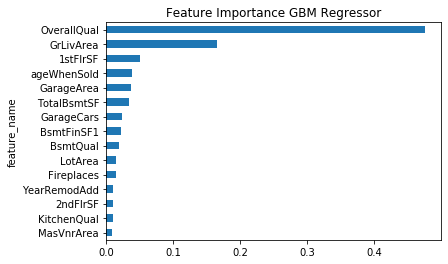

In [154]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance GBM Regressor')

# Preparing data for descriptive modeling using R

In [ ]:
housingFinalR = housing.copy()


In [ ]:
housingFinalR.drop('PID', axis=1, inplace=True)

In [ ]:
housingFinalR['ageWhenSold'] = housingFinalR.YrSold - housingFinalR.YearBuilt

housingFinalR.drop('YearBuilt', axis= 1, inplace=True)

In [ ]:
housingFinalR['pricePerSqft'] = housingFinalR.SalePrice/housingFinalR.GrLivArea

In [ ]:
sns.scatterplot(y=housingFinalR.pricePerSqft, x=housingFinalR.ageWhenSold)

In [ ]:
housingFinalR.drop('bb_diff', axis=1, inplace=True)

In [ ]:
housingR = housingFinalR.copy()

In [ ]:
housingR['logSalePrice'] = np.log(housingFinalR.SalePrice)

In [ ]:
housingR.to_csv("housingR.csv")


In [ ]:
housing2.plot(kind='scatter', x='SalePrice', y='GrLivArea')